## Data and the current economy
Download data on UK “Labour Productivity” from the website of the Office for National Statistics (ONS). The correct data should have the name “PRDY"

https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/labourproductivity/datasets/labourproductivity

## a)

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [92]:
df = pd.read_csv('prdy.csv')
df

,Title,Output per Worker: Whole Economy SA: Index 2019=100: UK,Output per Worker: Whole Economy: % change per annum SA: UK,Output per Worker: Whole Economy: % change quarter on previous quarter SA: UK,Whole Economy index of LFS Employment: SA % change on Q,Whole Economy index of LFS Employment: SA % change on Y,"Output per hour: Ag, forestry and fishing A SIC07, 2019=100, SA, UK","Output per hour: Ag, forestry and fishing A SIC07, % change on Y, SA, UK","Output per hour: Production B-E SIC07, 2019=100, SA, UK","Output per hour: Production B-E SIC07, % change on Q, SA, UK",...,Output per filled job: Whole economy: % change per annum SA: UK,UK Whole Economy: Productivity hours SA: Index 2019 = 100,UK Whole Economy: Output per hour worked SA: Index 2019 = 100,UK Whole Economy: Productivity hours % change per annum SA,UK Whole Economy: Output per hour worked % change per annum SA,Productivity Jobs:Whole Economy: % change quarter on previous quarter SA:UK,UK Whole Economy: Output per hour worked % change quarter on previous quarter SA,UK Whole Economy: Productivity Hours : % change quarter on previous quarter SA,Whole Economy index of LFS Employment: SA 2019=100,Ratio of Whole economy jobs to Whole economy workers: SA
0,CDID,A4YM,A4YN,A4YO,DIW8,DIW9,DJJ9,DJK2,DJK3,DJK4,...,LNNP,LZVA,LZVB,LZVC,LZVD,TXAJ,TXBB,TXBU,TXEL,TXET
1,PreUnit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Unit,"Index, base year = 100",%,%,%,%,"Index, base year = 100",%,"Index, base year = 100",%,...,%,"Index, base year = 100","Index, base year = 100",%,%,%,%,%,"Index, base year = 100",NaN
3,Release Date,15-02-2024,15-02-2024,15-02-2024,15-02-2024,15-02-2024,15-02-2024,15-02-2024,15-02-2024,15-02-2024,...,15-02-2024,15-02-2024,15-02-2024,15-02-2024,15-02-2024,15-02-2024,15-02-2024,15-02-2024,15-02-2024,15-02-2024
4,Next release,To be announced,To be announced,To be announced,To be announced,To be announced,To be announced,To be announced,To be announced,To be announced,...,To be announced,To be announced,To be announced,To be announced,To be announced,To be announced,To be announced,To be announced,To be announced,To be announced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,2022 Q3,101.2,1.2,0.0,-0.1,0.7,NaN,NaN,99.1,-2.2,...,1.1,99.1,102.4,1.1,0.8,-0.1,0.4,-0.4,100.3,100.3
323,2022 Q4,100.9,-0.5,-0.3,0.5,1.2,NaN,NaN,98.6,-0.5,...,-0.5,99.4,102.3,1.3,-0.6,0.4,-0.2,0.3,100.7,100.2
324,2023 Q1,100.8,-0.9,-0.1,0.4,1.3,NaN,NaN,99.6,1.0,...,-0.9,100.2,101.7,0.7,-0.3,0.5,-0.5,0.8,101.1,100.3
325,2023 Q2,100.9,-0.3,0.1,-0.1,0.6,NaN,NaN,99.8,0.1,...,-0.1,99.6,102.3,0.1,0.2,-0.4,0.6,-0.6,101.0,100.0


In [93]:
df_2 = pd.concat([df['Title'], df.loc[:, df.iloc[0] == 'LZVB']], axis=1)

df_p = df_2.loc[(df_2['Title'] >= '1971 Q1') & df_2['Title'].str.contains('Q')].copy()
df_p.rename(columns={'Title': 'Quarter'}, inplace=True)
df_p

,Quarter,UK Whole Economy: Output per hour worked SA: Index 2019 = 100
116,1971 Q1,42.6
117,1971 Q2,43.4
118,1971 Q3,44.2
119,1971 Q4,44.5
120,1972 Q1,44.2
...,...,...
322,2022 Q3,102.4
323,2022 Q4,102.3
324,2023 Q1,101.7
325,2023 Q2,102.3


In [94]:
df_p['Quarter'] = pd.to_datetime(df_p['Quarter'], format='%Y Q%m')
#df_p.loc[:, df_p.columns[1]] = pd.to_numeric(df_p.iloc[:, 1])
df_p

,Quarter,UK Whole Economy: Output per hour worked SA: Index 2019 = 100
116,1971-01-01,42.6
117,1971-02-01,43.4
118,1971-03-01,44.2
119,1971-04-01,44.5
120,1972-01-01,44.2
...,...,...
322,2022-03-01,102.4
323,2022-04-01,102.3
324,2023-01-01,101.7
325,2023-02-01,102.3


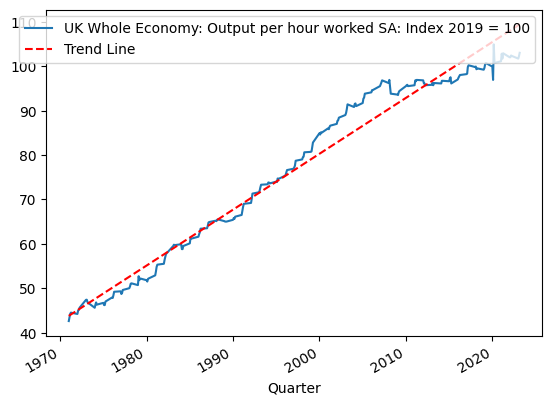

In [95]:
# Explicitly convert the second column to a numeric type, coercing errors to NaN
df_p[df_p.columns[1]] = pd.to_numeric(df_p[df_p.columns[1]], errors='coerce')
# Ensure the column is of a numeric type
df_p[df_p.columns[1]] = df_p[df_p.columns[1]].astype(float)


df_p.plot(x='Quarter', y=df_p.columns[1], kind='line')
plt.legend(["Productivity"])

# Preparing data for the trend line: get x-values as ordinal numbers from 'Quarter'
x = df_p['Quarter'].apply(lambda date: date.toordinal()).values.reshape(-1, 1)
y = df_p[df_p.columns[1]]

# Fit a simple linear trend line
z = np.polyfit(x.flatten(), y, 1)
p = np.poly1d(z)

# Plot the trend line
plt.plot(df_p['Quarter'], p(x).flatten(), "r--", label='Trend Line')
plt.legend()

# Display the plot with the trend line
plt.show()

### b-c)Discuss the shape of the graph after the 2008 financial crisis.

After the 2008 financial crisis, the graph shows a dip in productivity growth, reflecting the immediate impact of the crisis. Over the long term, the trend resumes an upward trajectory, with some fluctuations

The trnd line depends on the time period we chose for regression. The trend line would be steeper if the data till 2008 was used.

### d) Why might UK labour productivity have behaved as it has since the 2008 financial crisis? 

### e) Examine also the series “Output per Worker: Whole Economy SA: Index 2019=100: UK” (code = A4YM). Are you surprised by the behaviour of the productivity series in 2020 Q2 when the pandemic hit? If so, why? If not, why not?


In [96]:
df_3 = pd.concat([df['Title'], df.loc[:, df.iloc[0] == 'A4YM']], axis=1)

df_p2 = df_3.loc[(df_3['Title'] >= '1971 Q1') & df_3['Title'].str.contains('Q')].copy()
df_p2.rename(columns={'Title': 'Quarter'}, inplace=True)
df_p2

,Quarter,Output per Worker: Whole Economy SA: Index 2019=100: UK
116,1971 Q1,46.7
117,1971 Q2,47.6
118,1971 Q3,48.6
119,1971 Q4,49.0
120,1972 Q1,48.8
...,...,...
322,2022 Q3,101.2
323,2022 Q4,100.9
324,2023 Q1,100.8
325,2023 Q2,100.9


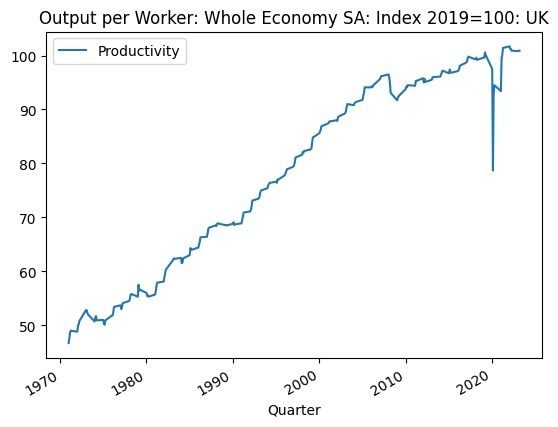

In [97]:
df_p2['Quarter'] = pd.to_datetime(df_p2['Quarter'], format='%Y Q%m')
df_p2[df_p2.columns[1]] = pd.to_numeric(df_p2[df_p2.columns[1]], errors='coerce')
df_p2.plot(x='Quarter', y=df_p2.columns[1], kind='line', title='Output per Worker: Whole Economy SA: Index 2019=100: UK')
plt.legend(["Productivity"])
plt.show()